<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Ajuste_automatico_AR_y%20_predicciones_USpopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años). 

In [102]:
import pandas as pd
import numpy as np
%matplotlib inline

# Cargamos herramientas especificas para forecast 
from statsmodels.tsa.ar_model import AR,ARResults

# Cargamos U.S. Population dataset
#Indexamos la variable "DATE" y la convertimos a formato fecha
df = pd.read_csv('https://raw.githubusercontent.com/virf96/curso-series-temporales/master/4.%20Modelos%20AR%20autorregresivos/Python/uspopulation.csv',
                 index_col='DATE',parse_dates=True)

#Indicamos una frecuencia mensual
df.index.freq = 'MS'

In [103]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

## Gráfico de la serie

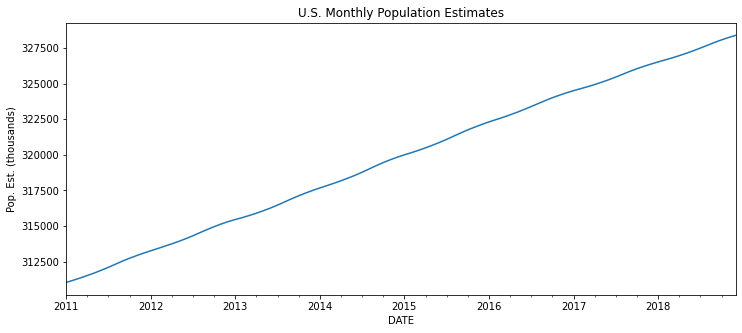

In [104]:
#Crecimiento mensual de la población en US
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

## Datos entrenamiento/prueba


In [105]:
len(df)

96

In [106]:
#Dividimos el df en test y train
train = df.iloc[:84]
test = df.iloc[84:]

## Modelo AR(1) 

In [107]:
# Ignoramos los warnings
import warnings
warnings.filterwarnings("ignore")

In [108]:
#Le pasamos a la función "AR" los datos
model = AR(train['PopEst'])
#Ajustamos el modelo indicando el número de retraso con "maxlag"  y estime los coeficiente por máxima verosimilitud
#En el caso de que "maxlag" sea mayor a uno considerara todos los modelos intermedios hasta llegar al indicado en el parametro
AR1fit = model.fit(maxlag=1,method='mle')
#Imprimimos el número de retrasos
print(f'Lag: {AR1fit.k_ar}')
#Me devuelve los coeficientes, es decir la constante y el retraso indicado
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        147.296808
L1.PopEst      0.999537
dtype: float64


In [109]:
AR1fit.aic

10.533689612341348

In [110]:
#En el caso de querer hacer predicciones, vamos a ir desde la última observación del conjunto de entrenamiento hasta donde termina el conjuntod de test
start=len(train)
end=len(train)+len(test)-1
#Predecimos
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [111]:
predictions1

2018-01-01    326374.208364
2018-02-01    326370.418482
2018-03-01    326366.630356
2018-04-01    326362.843982
2018-05-01    326359.059362
2018-06-01    326355.276494
2018-07-01    326351.495376
2018-08-01    326347.716010
2018-09-01    326343.938392
2018-10-01    326340.162524
2018-11-01    326336.388403
2018-12-01    326332.616030
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [112]:
len(predictions1)

12

In [113]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.2084, expected=326527
predicted=326370.4185, expected=326669
predicted=326366.6304, expected=326812
predicted=326362.844 , expected=326968
predicted=326359.0594, expected=327134
predicted=326355.2765, expected=327312
predicted=326351.4954, expected=327502
predicted=326347.716 , expected=327698
predicted=326343.9384, expected=327893
predicted=326340.1625, expected=328077
predicted=326336.3884, expected=328241
predicted=326332.616 , expected=328393


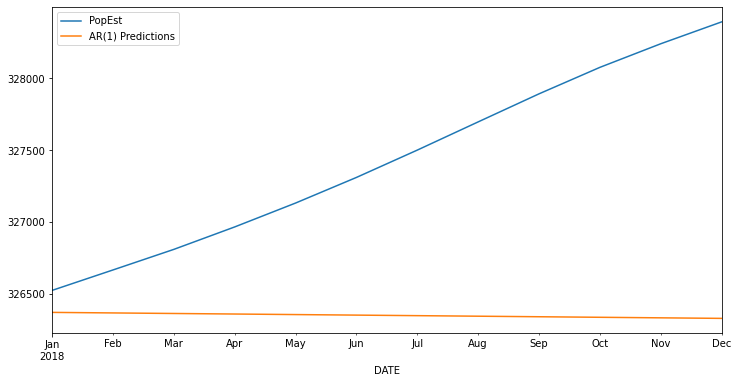

In [114]:
#Observamos las predicciones contra los datos observados
#El modelo no estima muy bien los valores reales
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Modelo AR(2)

In [115]:
# Añadimos un retraso a la complejidad del modelo
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        134.115961
L1.PopEst      1.996239
L2.PopEst     -0.996660
dtype: float64


In [117]:
AR2fit.aic

5.157101134928266

In [119]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

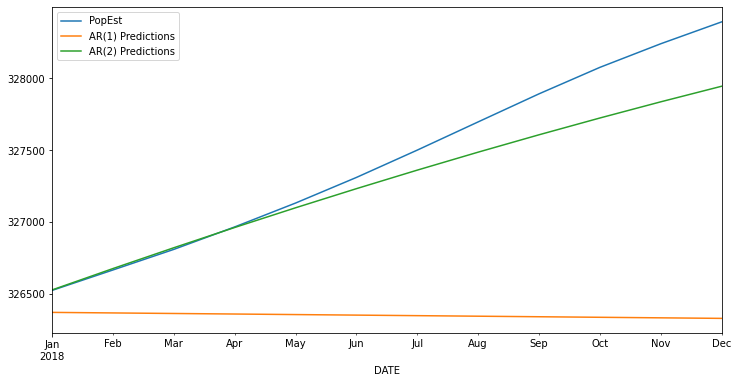

In [120]:
#Parece que con 2 retrasos el modelo va mejorando
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Modelo AR(p) donde statsmodels elige p


In [121]:
#Utilizamos el criterio de información BIC
#Al especificar el parametro "ic" la función devuelve os resultados para cierto número de retrasos y devuelve la cantidad de retrasos que se debe utilizar
#Para este caso se deberían considerar 8
ARfit = model.fit(ic='bic')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [122]:
#Ajustamos modelo
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

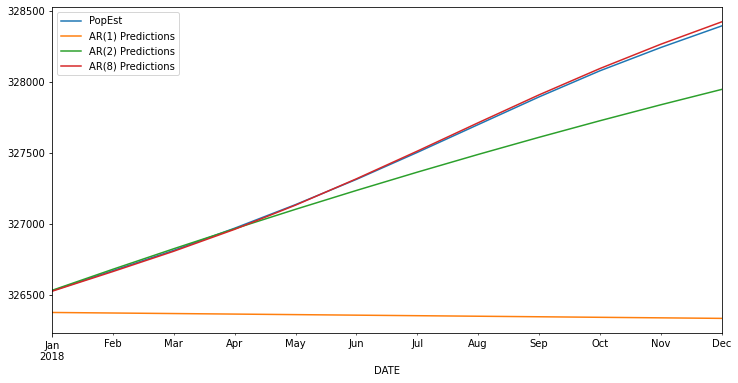

In [123]:
#Visualizamos resultados
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [124]:
#El modelo con el menor error es el AR(8)
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1552397.371
AR(2) Error: 53225.10866
AR(8) Error: 186.9705375


In [125]:
#Validamos también con el criterio de información AIC y el criterio más bajo es el de AR(8)
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.534
AR(2) AIC: 5.1571
AR(8) AIC: 3.5878


## Predicciones

In [127]:
# Primero re entrena el modelo con todo el data set
model = AR(df['PopEst'])

#Después ajusta el modelo
ARfit = model.fit(maxlag=8,method='mle')

# Haz las predicciones
#En este caso es para una ventana de tiempo de 12 
#En este caso le indicamos qu estima en el momento en el que termina el df hasta 12 momentos posteriores
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')



In [128]:
fcast

2019-01-01    328533.473424
2019-02-01    328662.343314
2019-03-01    328790.639113
2019-04-01    328926.549675
2019-05-01    329075.650573
2019-06-01    329236.054122
2019-07-01    329403.038791
2019-08-01    329575.663426
2019-09-01    329745.517422
2019-10-01    329902.465197
2019-11-01    330043.091536
2019-12-01    330167.942485
2020-01-01    330280.950356
Freq: MS, Name: Forecast, dtype: float64

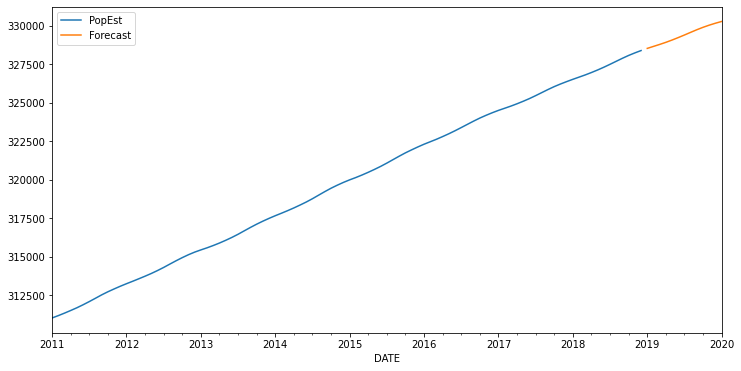

In [129]:
# Gráfica los rsultados
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));